In [1]:
from autox import AutoTS

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv(r"C:\Users\18484\Desktop\全部数据\附件2-行业日负荷数据.csv")
weather = pd.read_csv(r"C:\Users\18484\Desktop\全部数据\附件3-气象数据.csv")

In [62]:
weather['最高温度'] = weather['最高温度'].map(lambda d: d.replace('℃','')).astype(int)
weather['最低温度'] = weather['最低温度'].map(lambda d: d.replace('℃','')).astype(int)
weather['start_weather'] = weather['天气状况'].apply(lambda x: x.split('/')[0])
weather['end_weather'] = weather['天气状况'].apply(lambda x: x.split('/')[1])

dic1 = {'晴':0,'晴间多云':1, '多云':2, '局部多云':2,'阴':3 ,'雾':4, '小雨':5, '小到中雨':6, '小雨-中雨':6, '中雨':7, '阵雨':8,
 '中雨-大雨':9, '中到大雨':9, '大雨':9,'雷阵雨':10, '大到暴雨':11, '暴雨':12}
dic2 = {'无持续风向<3级':3, '北风4～5级':6, '微风<3级':3, '北风3':4, '东北风3～4级':5, '北风3～4级':5,
       '南风3～4级':5, '南风4～5级':6, '东北偏东风2':2, '无持续风向微风':0, '无持续风向1-2级':1, '东风3-4级':5,
       '东南风4-5级':6, '东风3～4级':5, '东北风3-4级':5, '东风8-9级':7, '东南风3-4级':5, '北风3-4级':5,
       '北风4-5级':6, '南风3-4级':5, '南风1-2级':1, '东南风1-2级':1, '西南风3-4级':5, '东风1-2级':1,
       '北风1-2级':1, '东北风1-2级':1, '西南风1-2级':1}
dic3 = {'无持续风向<3级':3, '北风4～5级':6, '北风3～4级':5, '微风<3级':3, '北风3':4, '东北偏东风2':2,
       '无持续风向微风':0, '无持续风向1-2级':1, '东风3-4级':5, '东南风4-5级':6, '东南风3～4级':5, '东北风3-4级':5,
       '东风8-9级':7, '东南风3-4级':5, '北风3-4级':5, '北风4-5级':6, '南风3-4级':5, '南风1-2级':1,
       '东南风1-2级':1, '西南风3-4级':5, '东风1-2级':1, '北风1-2级':1, '东北风1-2级':1, '西南风1-2级':1}

weather['start_weather']=weather['start_weather'].map(dic1)
weather['end_weather']=weather['end_weather'].map(dic1)
weather['白天风力风向']=weather['白天风力风向'].map(dic2)
weather['夜晚风力风向']=weather['夜晚风力风向'].map(dic3)

In [63]:
weather = weather.drop_duplicates(['日期'])

In [64]:
from datetime import datetime
start = datetime(2018, 1, 1)
end = datetime(2021, 8, 31,23)
tm = pd.date_range(start, end, freq='D')#H表示小时hour
time=pd.to_datetime((tm)).strftime('%Y-%m-%d')
df = df.rename(columns={'数据时间':'日期'})
weather  = weather.drop_duplicates(subset='日期')
weather = weather.drop_duplicates(subset='日期').reset_index()
weather['日期'] = pd.DataFrame(time)
weather['日期'] = weather['日期'].astype('str')

In [9]:
from datetime import datetime
start = datetime(2019, 1, 1)
end = datetime(2021, 8, 31,23)
tm = pd.date_range(start, end, freq='M')#H表示小时hour
time=pd.to_datetime((tm)).strftime('%Y-%m-%d %H-%M-%S')

# 最大值预测

In [65]:
df

行业类型          日期  有功功率最大值（kw）  有功功率最小值（kw）
0     大工业用电  2019-01-01  117888.3300   51526.5690
1     大工业用电  2019-01-02  126843.7914   63638.4294
2     大工业用电  2019-01-03  130286.1294  102048.2754
3     大工业用电  2019-01-04  133018.6344  104466.0762
4     大工业用电  2019-01-05  133504.4784   99507.3528
...     ...         ...          ...          ...
3605     商业  2021-08-27  104728.8762   19815.7638
3606     商业  2021-08-28   93855.1368   20820.2490
3607     商业  2021-08-29   84127.1658   21679.5828
3608     商业  2021-08-30  102851.2758   21036.5868
3609     商业  2021-08-31   96396.2568   21291.3042

[3610 rows x 4 columns]

In [39]:
df_max=pd.pivot_table(df,values='有功功率最大值（kw）',index='日期',columns='行业类型')
df_max = df.merge(weather,on='日期',how='left')

In [40]:
df_max['minute']= 1

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Matplotlib坐标轴负号'-'显示为方块的问题

In [41]:
df_max.to_csv('df_max.csv',index=0)

In [72]:
df_max = df.merge(weather,on='日期',how='left')

In [68]:
df_max['行业类型'].unique()

array(['大工业用电', '非普工业', '普通工业', '商业'], dtype=object)

In [74]:
dic = {'大工业用电':1, '非普工业':2, '普通工业':3, '商业':4}
df_max['行业类型'] = df_max['行业类型'].map(dic)

In [77]:
df_max

行业类型         日期  有功功率最大值（kw）  有功功率最小值（kw）  index     天气状况  最高温度  最低温度  白天风力风向  夜晚风力风向  start_weather  end_weather
0        1 2019-01-01  117888.3300   51526.5690    366      阴/阴    12     7       1       1              3            3
1        1 2019-01-02  126843.7914   63638.4294    367    小雨/小雨    11     6       1       1              5            5
2        1 2019-01-03  130286.1294  102048.2754    368    多云/小雨    15     9       1       1              2            5
3        1 2019-01-04  133018.6344  104466.0762    369     阴/小雨    17    12       1       1              3            5
4        1 2019-01-05  133504.4784   99507.3528    370     阴/小雨    17    12       1       1              3            5
...    ...        ...          ...          ...    ...      ...   ...   ...     ...     ...            ...          ...
3605     4 2021-08-27  104728.8762   19815.7638   1340  雷阵雨/雷阵雨    35    26       1       1             10           10
3606     4 2021-08-28   93855.1368   20820.2490   1341   雷阵雨/多云    33    26       1       1             10            2
3607     4 2021-08-29   84127.1658   21679.5828   1342  雷阵雨/雷阵雨    32    25       1       1             10           10
3608     4 2021-08-30  102851.2758   21036.5868   1343    阵雨/阵雨    34    26       1       1              8            8
3609     4 2021-08-31   96396.2568   21291.3042   1344   雷阵雨/阵雨    32    26       1       1             10            8

[3610 rows x 12 columns]

In [83]:
autots = AutoTS(df = df_max,
                    id_col = '行业类型',
                    time_col = '日期',
                    target_col ='有功功率最大值（kw）',
                    time_varying_cols = ['最高温度', '最低温度', '白天风力风向', '夜晚风力风向', 'start_weather','end_weather','有功功率最大值（kw）'],
                    time_interval_num = 24*60,
                    time_interval_unit = 'minute',
                    forecast_period = 91,
                    mode = 'cnn',
                    metric = 'mae')

sub = autots.get_result()

   INFO ->  [+] feature engineer
   INFO ->  [+] fe_time
   INFO ->  [+] fe_onehot
   INFO ->  [+] feature combination
100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 668.79it/s]
   INFO ->  [+] normalization
   INFO ->  [+] build data
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.03it/s]
   INFO ->  [+] training model


Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_47 (InputLayer)          [(None, 91, 7)]      0           []                               
                                                                                                  
 conv1d_46 (Conv1D)             (None, 91, 50)       750         ['input_47[0][0]']               
                                                                                                  
 conv1d_47 (Conv1D)             (None, 91, 50)       5050        ['conv1d_46[0][0]']              
                                                                                                  
 dense_69 (Dense)               (None, 91, 1)        51          ['conv1d_47[0][0]']              
                                                                                           

   INFO ->  [+] predict
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  9.43it/s]


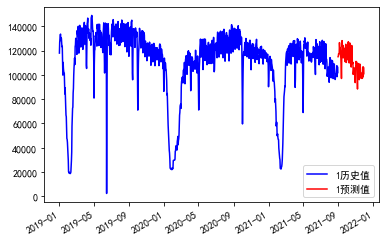

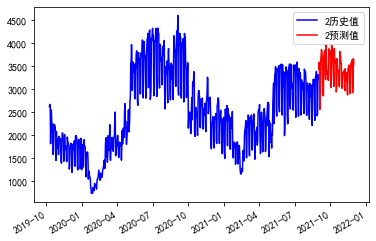

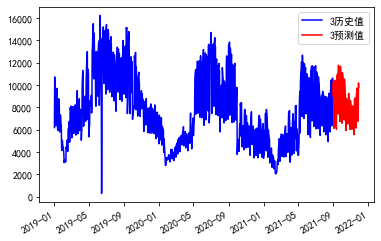

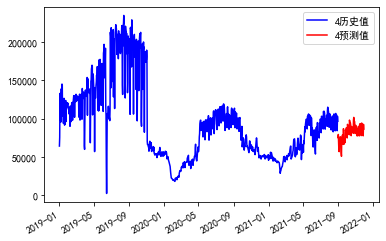

In [84]:
for i in [1,2,3,4]:
    df = df_max
    plt.plot(df.loc[df['行业类型'] == i, '日期'], df.loc[df['行业类型'] == i, '有功功率最大值（kw）'], color = 'b')
    plt.plot(sub.loc[sub['行业类型'] == i, '日期'], sub.loc[sub['行业类型'] == i, '有功功率最大值（kw）'], color = 'r')
    plt.gcf().autofmt_xdate()
    plt.legend(('%s历史值'%i, '%s预测值'%i)) 
    plt.savefig(r'C:\Users\18484\Desktop\自己的泰迪杯支撑材料\第二问预测\CNN第二大问最大值预测结果2%s.jpg'%i,dpi=400)
    plt.show()



In [85]:
sub1 = sub.rename(columns={'日期':'数据时间'})
sub1[['数据时间','有功功率最大值（kw）']].to_csv('第一大问第二小问最大值.csv',index=0)

# 最小值预测

In [86]:
autots = AutoTS(df = df_max,
                    id_col = '行业类型',
                    time_col = '日期',
                    target_col ='有功功率最小值（kw）',
                    time_varying_cols = ['最高温度', '最低温度', '白天风力风向', '夜晚风力风向', 'start_weather','end_weather','有功功率最小值（kw）'],
                    time_interval_num = 24*60,
                    time_interval_unit = 'minute',
                    forecast_period = 91,
                    mode = 'cnn',
                    metric = 'mae')

sub = autots.get_result()

   INFO ->  [+] feature engineer
   INFO ->  [+] fe_time
   INFO ->  [+] fe_onehot
   INFO ->  [+] feature combination
100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1002.46it/s]
   INFO ->  [+] normalization
   INFO ->  [+] build data
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.09it/s]
   INFO ->  [+] training model


Model: "model_49"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 91, 7)]      0           []                               
                                                                                                  
 conv1d_48 (Conv1D)             (None, 91, 50)       750         ['input_49[0][0]']               
                                                                                                  
 conv1d_49 (Conv1D)             (None, 91, 50)       5050        ['conv1d_48[0][0]']              
                                                                                                  
 dense_72 (Dense)               (None, 91, 1)        51          ['conv1d_49[0][0]']              
                                                                                           

   INFO ->  [+] predict
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  9.71it/s]


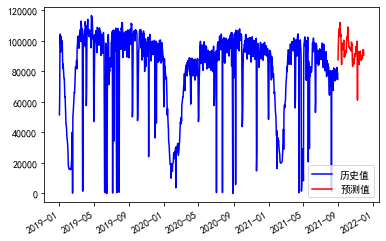

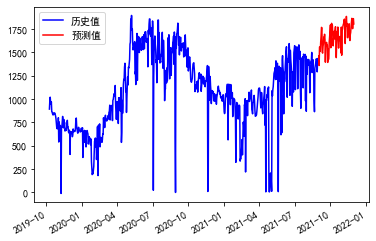

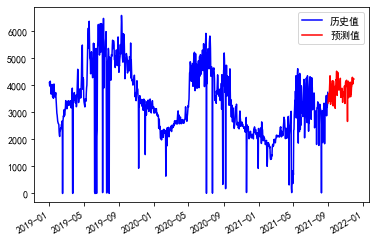

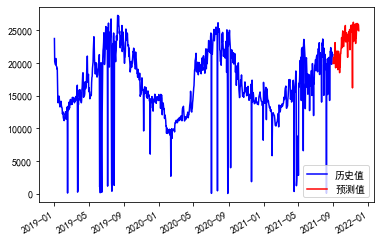

In [88]:
for i in [1,2,3,4]:
    df = df_max
    plt.plot(df.loc[df['行业类型'] == i, '日期'], df.loc[df['行业类型'] == i, '有功功率最小值（kw）'], color = 'b')
    plt.plot(sub.loc[sub['行业类型'] == i, '日期'], sub.loc[sub['行业类型'] == i, '有功功率最小值（kw）'], color = 'r')
    plt.gcf().autofmt_xdate()
    plt.legend(('历史值', '预测值')) 
    plt.savefig(r'C:\Users\18484\Desktop\自己的泰迪杯支撑材料\第二问预测\CNN第二大问最小值预测结果%s.jpg'%i,dpi=400)
    plt.show()

In [91]:
sub1 = sub.rename(columns={'日期':'数据时间'})
sub1[['数据时间','有功功率最小值（kw）']].to_csv(r'C:\Users\18484\Desktop\自己的泰迪杯支撑材料\第二问预测\第一大问第二小问最小值.csv',index=0)